# Flappy Bird Project: Compare Various RL Algorithms


## Course: Summer 2018, Deep Reinforcement Learning

**Professor: Dr. James Shanahan**

**TA: Christopher Dailey**

**Students: Gelesh Omathil, Naveen Kaul, Murali Cheruvu**



# Project Details: 

## Goal:
Produce a Table of RL-based approaches - Tabular and Value Approximations, where each row is an approach and each column is a dimension that differentiates the approaches such as model free, which of the quintuple each uses (State, Action, Transitions,  Rewards, etc..), and other dimensions.

## Flappy Bird Game:
Flappybird is a side-scrolling game where the agent must successfully navigate through gaps between pipes. The up arrow causes the bird to accelerate upwards. If the bird makes contact with the ground or pipes, or goes above the top of the screen, the game is over. For each pipe it passes through it gains a positive reward. Each time a terminal state is reached it receives a negative reward.

Determine a good policy for Flappy Birds using  any one or more of the following algorithms (aim to get 140 points or more!):
* Tabular - Q-Learning, Value Approximators: Linear Regression, Simple Q-Learning and Deep Q-Learning Networks

You may have to discretize the  space of  following parameters.
* Vertical distance from lower pipe
* Horizontal distance from next pair of pipes
* Life: Dead or Living

**Actions**
For each state, there two possible actions
* Up
* Down

**Rewards**
The reward structure is purely based on the "Life" parameter. One possible such structure could be the following (feel free to explore more):
* **+1** if Flappy Bird is still alive
* **-1000** if Flappy Bird is dead

## Flappy Birds Simulator:
Please use the openai gym environment for this project:

* https://gym.openai.com/envs/FlappyBird-v0/


## Submission

Please submit a report notebook and the python code-base for the algorithms.



# Reinforcement Algorithms

## List of Algorithms

We have implemented the following algorithms to train and play the flappy bird game:

* Tabular: Q-Learning
* Value Approximator: Linear Regression
* Value Approximator: Simple Q-Learning Network
* Value Approximator: Deep Q-Learning Network

**Note: Please refer to each of the above Jupyter Notebooks for the algorithm concepts, details and implementation**

## Technologies Used:

* Python - Keras, TensorFlow and standard libraries
* PyGame and Open AI Gym for Game Environment
* Open AI Gym complaint Flappy Bird Environment
* GPU enabled Cloud to run the Deep Q-Learning Network algorithm (using Microsoft Azure Windows Platform)


# Algorithms: Metrics and Comparison

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from matplotlib.cbook import MatplotlibDeprecationWarning
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import json

df = pd.DataFrame(columns=["algorithm", "duration", "episode", "score"])
stats = pd.DataFrame(columns=["Algorithm", "Total Duration", "Total Episodes", "Max Score"])

def load_json_data(file_name, df):
    with open(file_name, 'r') as f:
          json_data = json.load(f)
    f.close()
    
    for item in json_data:
        duration =  int(item["duration"].split(':')[0]) * 60 + int(item["duration"].split(':')[1])
        df.loc[len(df)]  = [item["algorithm"], duration, item["episode"], item["score"]]    
        
def update_stats(df, stats, algorithm):    
    df_filtered = df.query("algorithm == '{}'".format(algorithm))    
    stats.loc[len(stats)] = [
                                df_filtered.iloc[0]["algorithm"],
                                df_filtered["duration"].max(),
                                df_filtered["episode"].max(),                               
                                df_filtered["score"].max()                            
                            ]
    
                

load_json_data("data/stats_flappy_bird_linear.json", df)
load_json_data("data/stats_flappy_bird_Simple_Neural_Network.json", df)
load_json_data("data/stats_flappy_bird_DQN.json", df)
load_json_data("data/stats_flappy_bird_tabular_q_learning.json", df)

In [5]:
update_stats(df, stats, 'tabular_q_learning')
update_stats(df, stats, 'Simple_Neural_Network')
update_stats(df, stats, 'linear')
update_stats(df, stats, 'DQN')

In [6]:
stats

,Algorithm,Total Duration,Total Episodes,Max Score
0,tabular_q_learning,243,160,1141
1,Simple_Neural_Network,162,9999,120
2,linear,1035,9000,161
3,DQN,68,1500,1


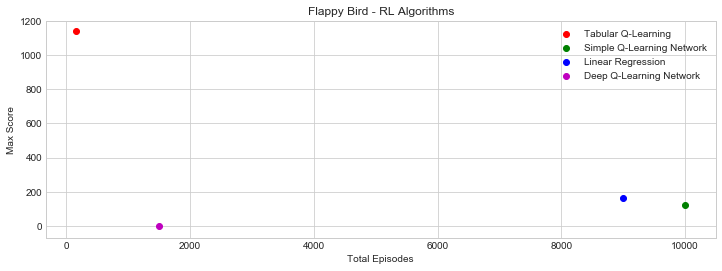

In [7]:
plt.title("Flappy Bird - RL Algorithms")
plt.xlabel('Total Episodes')
plt.ylabel('Max Score')    
plt.xlabel('Total Episodes')
plt.ylabel('Max Score')    
plt.scatter(stats.iloc[0]["Total Episodes"], stats.iloc[0]["Max Score"],color='r',label='Tabular Q-Learning')
plt.scatter(stats.iloc[1]["Total Episodes"], stats.iloc[1]["Max Score"],color='g',label='Simple Q-Learning Network')
plt.scatter(stats.iloc[2]["Total Episodes"], stats.iloc[2]["Max Score"],color='b',label='Linear Regression')
plt.scatter(stats.iloc[3]["Total Episodes"], stats.iloc[3]["Max Score"],color='m',label='Deep Q-Learning Network')
plt.legend(loc="best") 
plt.show()

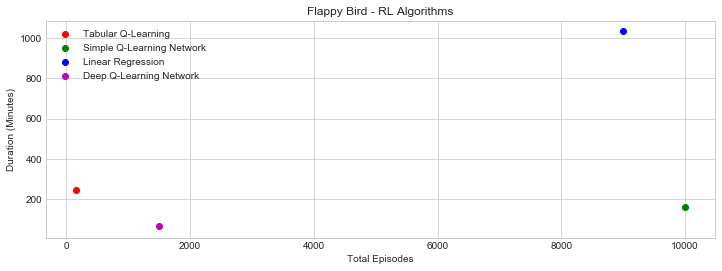

In [8]:
plt.title("Flappy Bird - RL Algorithms")
plt.xlabel('Total Episodes')
plt.ylabel('Duration (Minutes)')    
plt.scatter(stats.iloc[0]["Total Episodes"], stats.iloc[0]["Total Duration"],color='r',label='Tabular Q-Learning')
plt.scatter(stats.iloc[1]["Total Episodes"], stats.iloc[1]["Total Duration"],color='g',label='Simple Q-Learning Network')
plt.scatter(stats.iloc[2]["Total Episodes"], stats.iloc[2]["Total Duration"],color='b',label='Linear Regression')
plt.scatter(stats.iloc[3]["Total Episodes"], stats.iloc[3]["Total Duration"],color='m',label='Deep Q-Learning Network')
plt.legend(loc="best") 
plt.show()

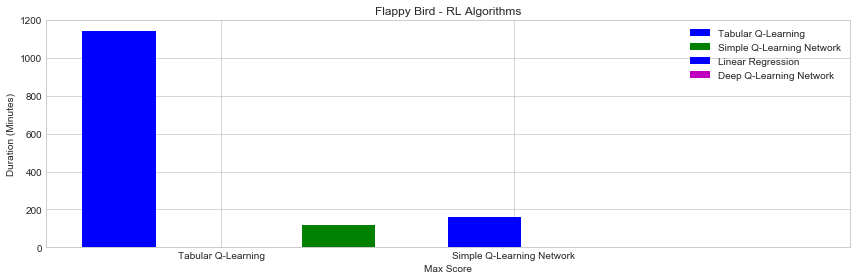

In [10]:
#plt.figure(figsize=(1,1))
plt.title("Flappy Bird - RL Algorithms")
plt.xlabel('Max Score')
plt.ylabel('Duration (Minutes)') 
bar_width = 0.35
x_pos = np.arange(2)
plt.bar(0,stats.iloc[0]["Max Score"],color=['b'],label='Tabular Q-Learning', width=0.25)
plt.bar(0.75,stats.iloc[1]["Max Score"],color=['g'],label='Simple Q-Learning Network',width=0.25)
plt.bar(1.25,stats.iloc[2]["Max Score"],color=['b'],label='Linear Regression',width=0.25)
plt.bar(2.25,stats.iloc[3]["Max Score"],color=['m'],label='Deep Q-Learning Network',width=0.25)

plt.xticks(x_pos + bar_width,['Tabular Q-Learning', 
                                'Simple Q-Learning Network', 
                                'Linear Regression', 
                                'Deep Q-Learning Network'])
plt.legend(loc="best") 
plt.tight_layout()
plt.show()

In [11]:
def plot_episode_and_score(algorithm, df):
    df_filtered = df.query("algorithm == '{}'".format(algorithm))
    plt.title("Flappy Bird - {}".format(algorithm))
    plt.xlabel('Episodes')
    plt.ylabel('Score')    
    plt.plot(df_filtered["episode"], df_filtered["score"])    
    plt.show()

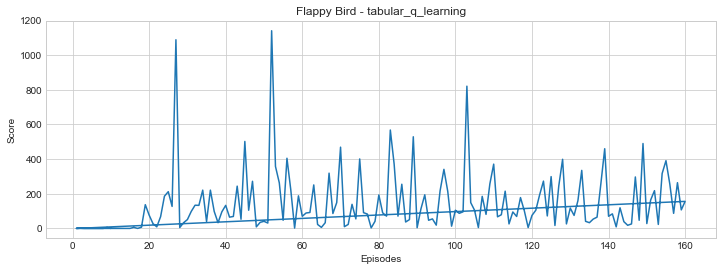

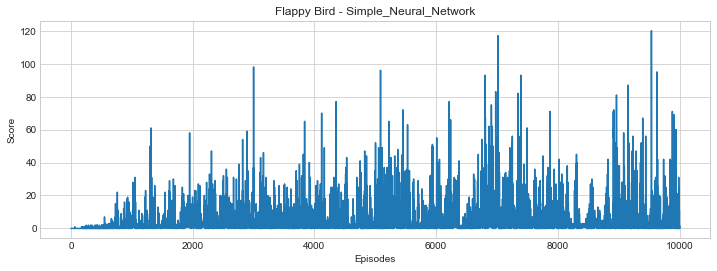

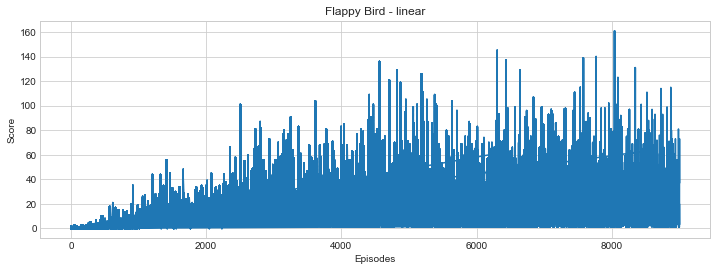

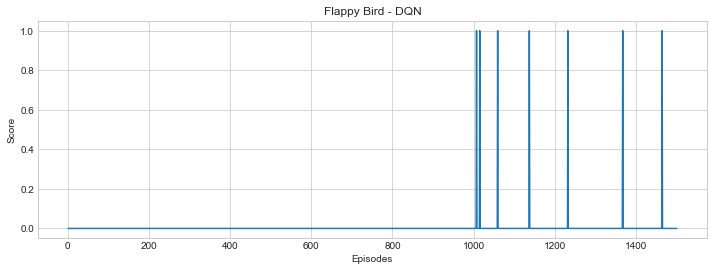

In [13]:
plot_episode_and_score("tabular_q_learning", df)
plot_episode_and_score("Simple_Neural_Network", df)
plot_episode_and_score("linear", df)
plot_episode_and_score("DQN", df)

# References: 

**We would like thank our professor: Dr. Shanahan and TA, Chris Dailey for their great guidance and continual help and support during the Deep Reinforcement Learning course.**

**We would also like to thank various developers and authors of the Reinforcement Learning related including the references given in the following links.**

Hardik Bansal 
https://hardikbansal.github.io/FlappyDQNBlog/



Cihan Ceyhan , Data Scientist at Pointlogic, A Nielsen Company Rotterdam Area, Netherlands ( May 22, 2016 – Jul 30, 2018 ) https://github.com/chncyhn/flappybird-qlearning-bot

 

Yen Chen Lin,Software Engineer Intern at Uber Advanced Technologies Group
Mar 13, 2016 – Jul 30, 2018,
https://github.com/yenchenlin/DeepLearningFlappyBird
 

Aron Szanto, Caetno Hanta-Davis, Joseph Kahn Jan 24 2017
https://github.com/aronszanto/Flappy-BirdLearning/blob/master/FB%20White%20Paper.pdf

 

rabbitnoname Apr 10, 2017
https://github.com/rabbitnoname/rlsimple/blob/master/DQN/deep_q_network.py




Flood Sung Apr 16 2018
https://github.com/floodsung/Gym-Flappy-Bird/blob/master/gym_flappy_bird/envs/flappy_bird_env.py


EMMANUEL RACHELSON  professor of Machine Learning and Optimization at ISAE-SUPAERO (the French Aeronautics and Space Institute) in Toulouse, France Jan 30 2018
https://github.com/SupaeroDataScience/RLchallenge/blob/master/RandomBird/FlappyAgnt.py


Norm Palo Alto, CA May 11 2016 
https://github.com/ntasfi/PyGame-Learning-Environment/blob/master/docs/user/home.rst


Shan-Hung Wu & DataLab Fall 2017
https://nthu-datalab.github.io/ml/labs/16-1_Q-Learning/16-1_Q_Learning.html

 

Andrej Karpathy, May 31, 2016 PhD student at Stanford working on Deep Learning
http://karpathy.github.io/2016/05/31/rl/


Arthur Juliani Editor of Beyond Intelligence Aug 25, 2016
https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0


https://github.com/mebusy/notes/blob/master/dev_notes/RL_DavidSilver.md


Tanner Fiez
Ph.D. Student at the University of  Washington, Seattle, WA  Nov 5 2017
https://github.com/fiezt/Reinforcement-Learning/blob/master/code/OpenAIGymExamples.ipynb


Massimiliano Patacchiolampatacchiola
Researcher specialised in computational modelling with Machine Learning and Deep Learning methods. Intern at Snapchat (London).Aug 14 2017 https://github.com/mpatacchiola/dissecting-reinforcement-learning/blob/master/src/6/multi-armed-bandit/epsilon_greedy_agent_bandit.py


Dung Lai 
https://dunglai.github.io/2017/09/21/FlappyBirdAI/
 

MARCH 24, 2017
https://blog.openai.com/evolution-strategies/
 

Noel Bambrick Customer Success Manager @ AYLIEN
13 Apr, 2017
http://blog.aylien.com/flappy-bird-and-evolution-strategies-an-experiment/

  

Ben Lau ,July 10 2016
https://yanpanlau.github.io/2016/07/10/FlappyBird-Keras.html


Dung Lai
https://dunglai.github.io/2017/10/10/linear-regression/
 
 
Aman Dalmia Wadhwani Institute of AI Feb 19 2018

https://github.com/dalmia/David-Silver-Reinforcement-learning/blob/master/Week%206%20-%20Value%20Function%20Approximations/Q-Learning%20with%20Value%20Function%20Approximation.ipynb



jmathison Jan 26 2018
https://github.com/jmathison/gym-simpleflappy

 

https://tonypoer.io/2016/12/15/making-an-ai-to-play-flappy-bird-w-q-learning/
 

James Lee Future Tech. Ai, Blockchain and game design enthusiast. AI Research Fellow at Nurture.Ai & moderator of the FB group Awesome AI Papers
Dec 13, 2017
https://medium.com/@jamsawamsa/running-a-google-cloud-gpu-for-fast-ai-for-free-5f89c707bae6

 

ssusnic Aug 15 2017
https://github.com/ssusnic/Machine-Learning-Flappy-Bird


http://burlap.cs.brown.edu/tutorials_v2/scd/p1.html 

 

Keon keon Software Engineer at Uber, San Francisco , Ken Fehling Web and mobile dev, music maker, budding data scientist may 31 2018
https://github.com/keon/deep-q-learning/blob/master/dqn.py


Yash Patel Developer interested in AI, Blockchain , Jul 30, 2017
https://towardsdatascience.com/reinforcement-learning-w-keras-openai-dqns-1eed3a5338c

 

Gaetan Juvin Chief Academic Officer at 42 Silicon Valley. Previously Founder of @RecastAI , Jun 29, 2017
https://medium.com/@gtnjuvin/my-journey-into-deep-q-learning-with-keras-and-gym-3e779cc12762

 